In [11]:
import pydub    
from pydub.playback import play
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def trimAudio(input_path, start_time, end_time):
    # Load the audio file
    audio = pydub.AudioSegment.from_file(input_path)

    # Set the start and end time (in milliseconds)
    start = start_time * 1000
    end = end_time * 1000

    # Trim the audio
    trimmed_audio = audio[start:end]

    return trimmed_audio

def arrayAudio(audio):
    return np.array(audio.get_array_of_samples())

def noiseAudio(audio):
    duration = audio.duration_seconds
    
    # Generate noise signal with same duration as audio
    noise_signal = np.random.normal(0, 0.1, int(duration * 1000 * audio.frame_rate * audio.channels))

    # Convert audio to NumPy array
    audio_data = np.array(audio.get_array_of_samples())

    # Adjust length of noise signal to match original audio signal
    if len(noise_signal) > len(audio_data):
        noise_signal = noise_signal[:len(audio_data)]
    else:
        while len(noise_signal) < len(audio_data):
            noise_signal = np.concatenate([noise_signal, noise_signal])

        noise_signal = noise_signal[:len(audio_data)]

    # Add noise to audio signal
    noisy_audio_data = audio_data + noise_signal
    noisy_audio = pydub.AudioSegment(
        data=noisy_audio_data.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=audio.sample_width,
        channels=audio.channels
    )
    return noisy_audio_data


In [11]:
for i in range(20,10-1,-1):
    print(i)

20
19
18
17
16
15
14
13
12
11
10


In [5]:
order.reverse

<function list.reverse()>

In [79]:
musik = trimAudio("./musik_krsti.mp3", 0, 5)
musik_noise = noiseAudio(musik)
musik_noise.export("musik_noise.mp3", format="mp3")
musik_noise = pydub.AudioSegment.from_file("musik_noise.mp3", format="mp3")

AttributeError: 'numpy.ndarray' object has no attribute 'export'

AttributeError: 'numpy.ndarray' object has no attribute 'get_array_of_samples'

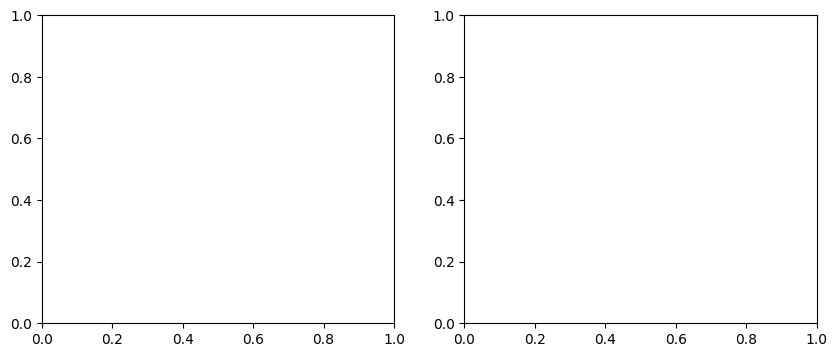

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(10,4))
ax1.plot(arrayAudio(musik_noise), 'r')
ax2.plot(arrayAudio(musik))
#x1Add plot labels and title
ax1.set_xlabel("Time (samples)")
ax1.set_ylabel("Amplitude")
ax1.set_title("Audio Signal")
ax2.set_xlabel("Time (samples)")

ax2.set_title("Audio Signal")

# Show plot
plt.show()

In [ ]:
print("Original audio duration:", musik.duration_seconds)
print("Noisy audio duration:", musik_noise.duration_seconds)

In [66]:
play(musik_noise)

In [36]:
play(musik)

KeyboardInterrupt: 

In [72]:
print("Original audio duration:", musik.duration_seconds)
print("Noisy audio duration:", musik_noise.duration_seconds)

Original audio duration: 5.0
Noisy audio duration: 20.0
